# import các thư viện cần thiết

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import torch
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,f1_score
import numpy as np
from tqdm import tqdm
%matplotlib inline

# Đọc file dữ liệu data_price_house_cleaning.csv bộ dữ liệu đã được xử lí qua trước đó

In [3]:
data_price_house = pd.read_csv('Data/data_price_house_cleaning.csv')
data_price_house = data_price_house.drop(columns=['Mã tin'])
data_price_house = data_price_house.drop(columns=['Đường trước nhà'])
data_price_house.head()

Giá  Diện tích  Mặt tiền  Số tầng  Số phòng  Số toilet Nội thất Copy
0    4.35       36.0         6        3         3          3         không
1    5.70       58.7         4        2         2          2         không
2    7.00       80.0         4        4         4          5         không
3    4.80       68.0         4        2         4          3         không
4  800.00       28.0        35        2         1          1         không

# Hiển thị thông tin tổng quan về dữ liệu

In [4]:
data_price_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35992 entries, 0 to 35991
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Giá            35992 non-null  float64
 1   Diện tích      35992 non-null  float64
 2   Mặt tiền       35992 non-null  int64  
 3   Số tầng        35992 non-null  int64  
 4   Số phòng       35992 non-null  int64  
 5   Số toilet      35992 non-null  int64  
 6   Nội thất Copy  35992 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 1.9+ MB


# kiểm tra lại còn giá trị NaN không

In [5]:
data_price_house.isna().sum()

Giá              0
Diện tích        0
Mặt tiền         0
Số tầng          0
Số phòng         0
Số toilet        0
Nội thất Copy    0
dtype: int64

# Kích thước bộ dữ liệu

In [6]:
data_price_house.shape

(35992, 7)

In [7]:
data_price_house['Không'] = data_price_house['Nội thất Copy'].apply(lambda x: 1 if x == 'không' else 0)
data_price_house['Đầy đủ'] = data_price_house['Nội thất Copy'].apply(lambda x: 1 if x == 'đầy đủ' else 0)
data_price_house['Cơ bản'] = data_price_house['Nội thất Copy'].apply(lambda x: 1 if x == 'cơ bản' else 0)
data_price_house = data_price_house.drop(columns=['Nội thất Copy'])
data_price_house

Giá  Diện tích  Mặt tiền  Số tầng  Số phòng  Số toilet  Không  \
0        4.35       36.0         6        3         3          3      1   
1        5.70       58.7         4        2         2          2      1   
2        7.00       80.0         4        4         4          5      1   
3        4.80       68.0         4        2         4          3      1   
4      800.00       28.0        35        2         1          1      1   
...       ...        ...       ...      ...       ...        ...    ...   
35987    3.00      100.0         5        4         5          5      1   
35988   10.00      200.0        10        4         3          3      1   
35989    3.00      100.0         1        4         3          3      1   
35990    3.50      342.0         1        1         1          1      1   
35991    0.00       77.0         1        1         1          1      1   

       Đầy đủ  Cơ bản  
0           0       0  
1           0       0  
2           0       0  
3           0       0  
4           0       0  
...       ...     ...  
35987       0       0  
35988       0       0  
35989       0       0  
35990       0       0  
35991       0       0  

[35992 rows x 9 columns]

In [8]:
data_price_house = data_price_house.drop(data_price_house[data_price_house['Diện tích'] > 2000].index)

In [9]:
data_price_house['Giá'].round().value_counts().reset_index().sort_values(by='index', ascending=True)

index   Giá
7      0.0  1409
11     1.0   804
4      2.0  2938
1      3.0  4129
0      4.0  5452
..     ...   ...
82   980.0    14
142  990.0     5
95   996.0    10
212  998.0     2
151  999.0     4

[297 rows x 2 columns]

In [10]:
data_price_house['Diện tích'].value_counts().reset_index().sort_values(by='index', ascending=True)

index  Diện tích
4       0.0       1136
57      1.0        168
539     3.0          1
184     4.0         17
274     5.0          6
..      ...        ...
734  1792.0          1
621  1800.0          1
865  1834.0          1
327  1900.0          4
142  2000.0         31

[929 rows x 2 columns]

In [11]:
data_price_house['Mặt tiền'].value_counts().reset_index().sort_values(by='index', ascending=True)

index  Mặt tiền
0       1     14062
20      2        58
4       3      1428
1       4      7730
2       5      5763
3       6      2338
5       7       972
6       8       810
9       9       329
7      10       571
14     11       104
8      12       365
16     13        84
19     14        61
10     15       204
17     16        71
26     17        29
13     18       111
15     19        93
12     20       172
22     21        50
18     22        65
31     23        10
29     24        15
21     25        52
32     26         7
40     27         3
39     28         3
44     29         2
11     30       183
46     31         1
27     32        20
36     33         6
33     34         6
30     35        15
28     36        19
45     37         1
43     38         2
24     40        31
42     41         2
23     42        33
34     43         6
35     44         6
25     45        30
41     46         2
37     47         4
38     48         3

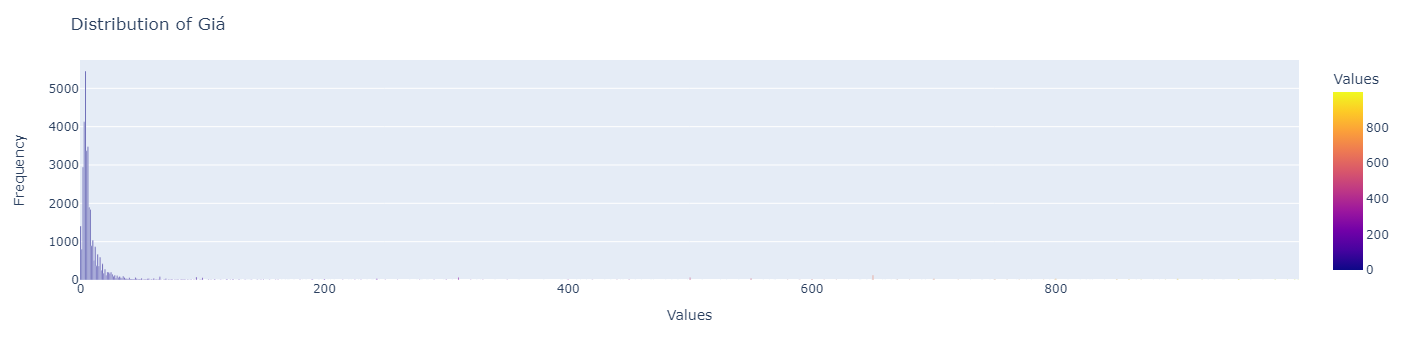

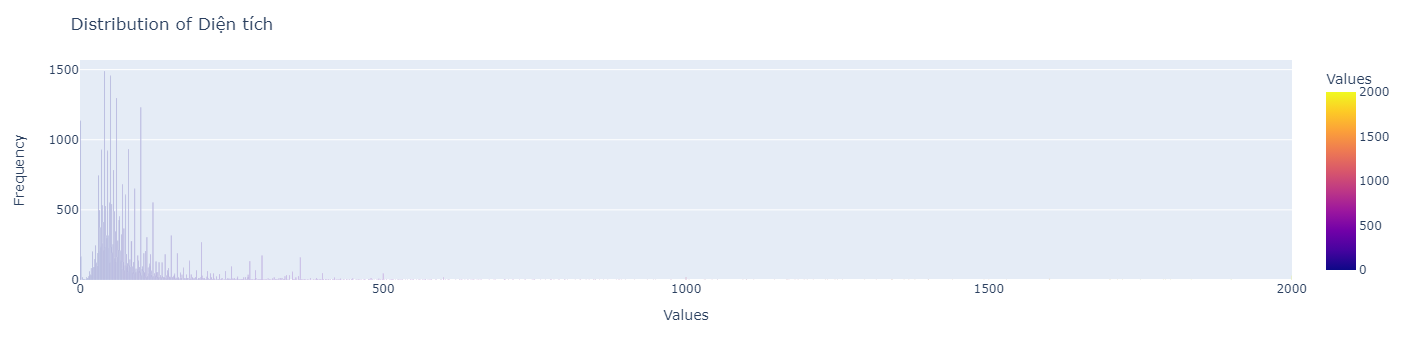

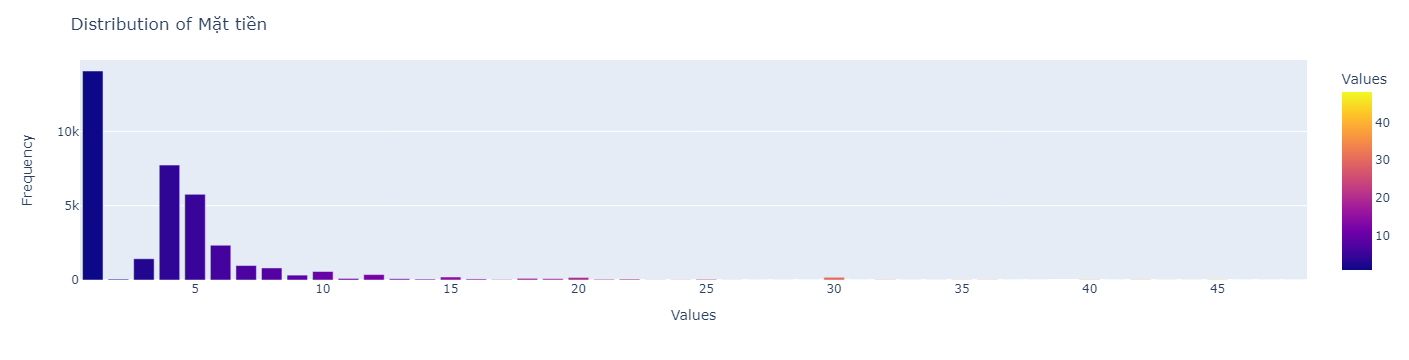

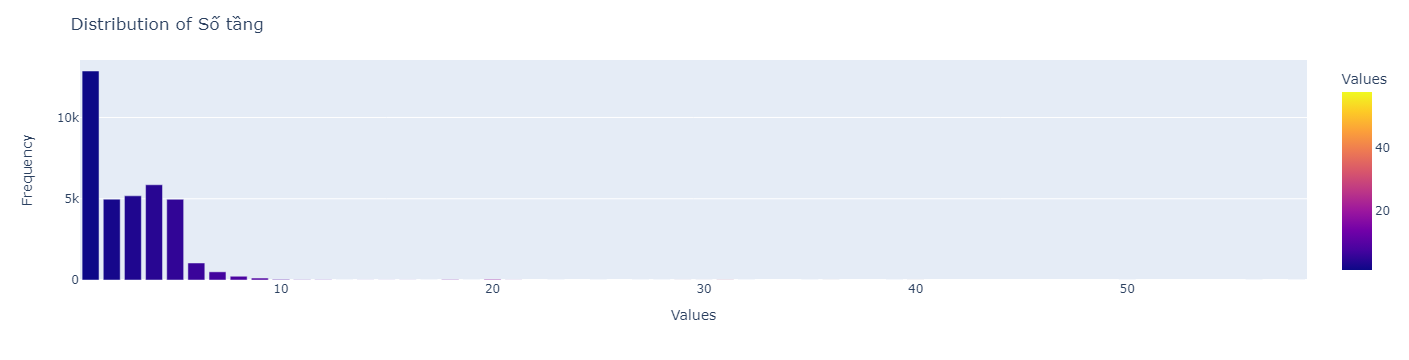

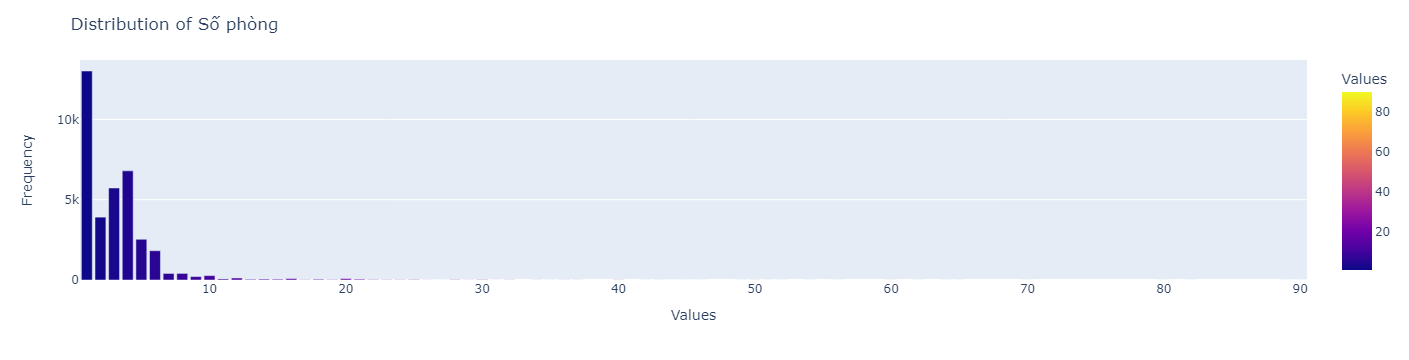

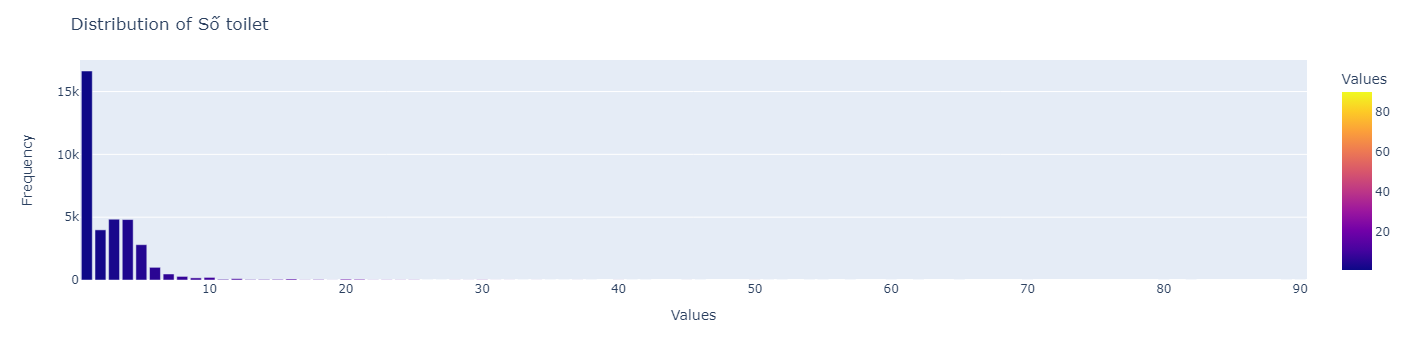

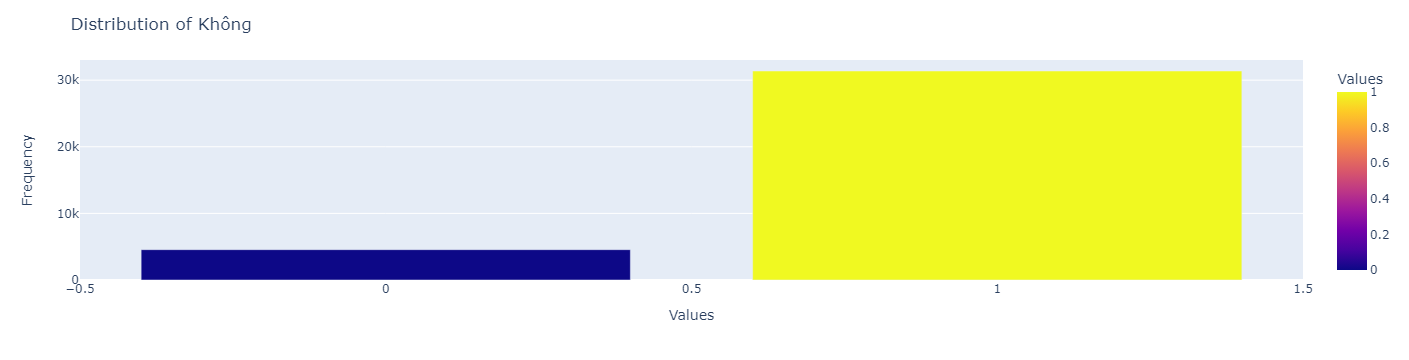

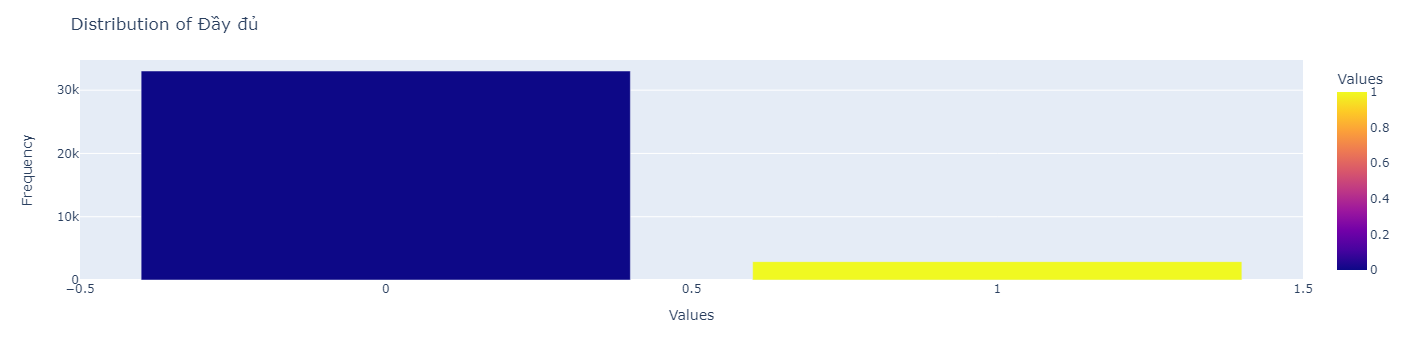

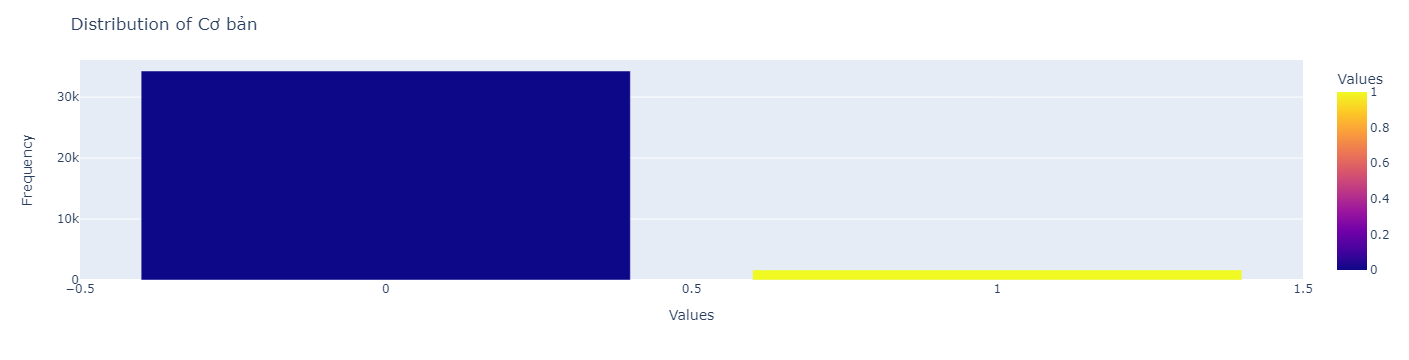

In [12]:
import plotly.express as px

# Xác định số cột tối đa bạn muốn vẽ


# Lặp qua các cột và vẽ biểu đồ cho mỗi cột
for i, col in enumerate(data_price_house.columns):

    # Sử dụng value_counts để đảm bảo có dữ liệu để vẽ
    try:
        value_counts = data_price_house[col].round().value_counts().reset_index().sort_values(by='index', ascending=True)
    except:
        value_counts = data_price_house[col].value_counts().reset_index().sort_values(by='index', ascending=True)

    # Vẽ biểu đồ bar nếu có dữ liệu
    if not value_counts.empty:
        fig = px.bar(value_counts, x='index', y=col, color='index', labels={'index': 'Values', col: 'Frequency'})
        fig.update_layout(title_text=f"Distribution of {col}", xaxis_title="Values", yaxis_title="Frequency")
        fig.show()


<AxesSubplot: >

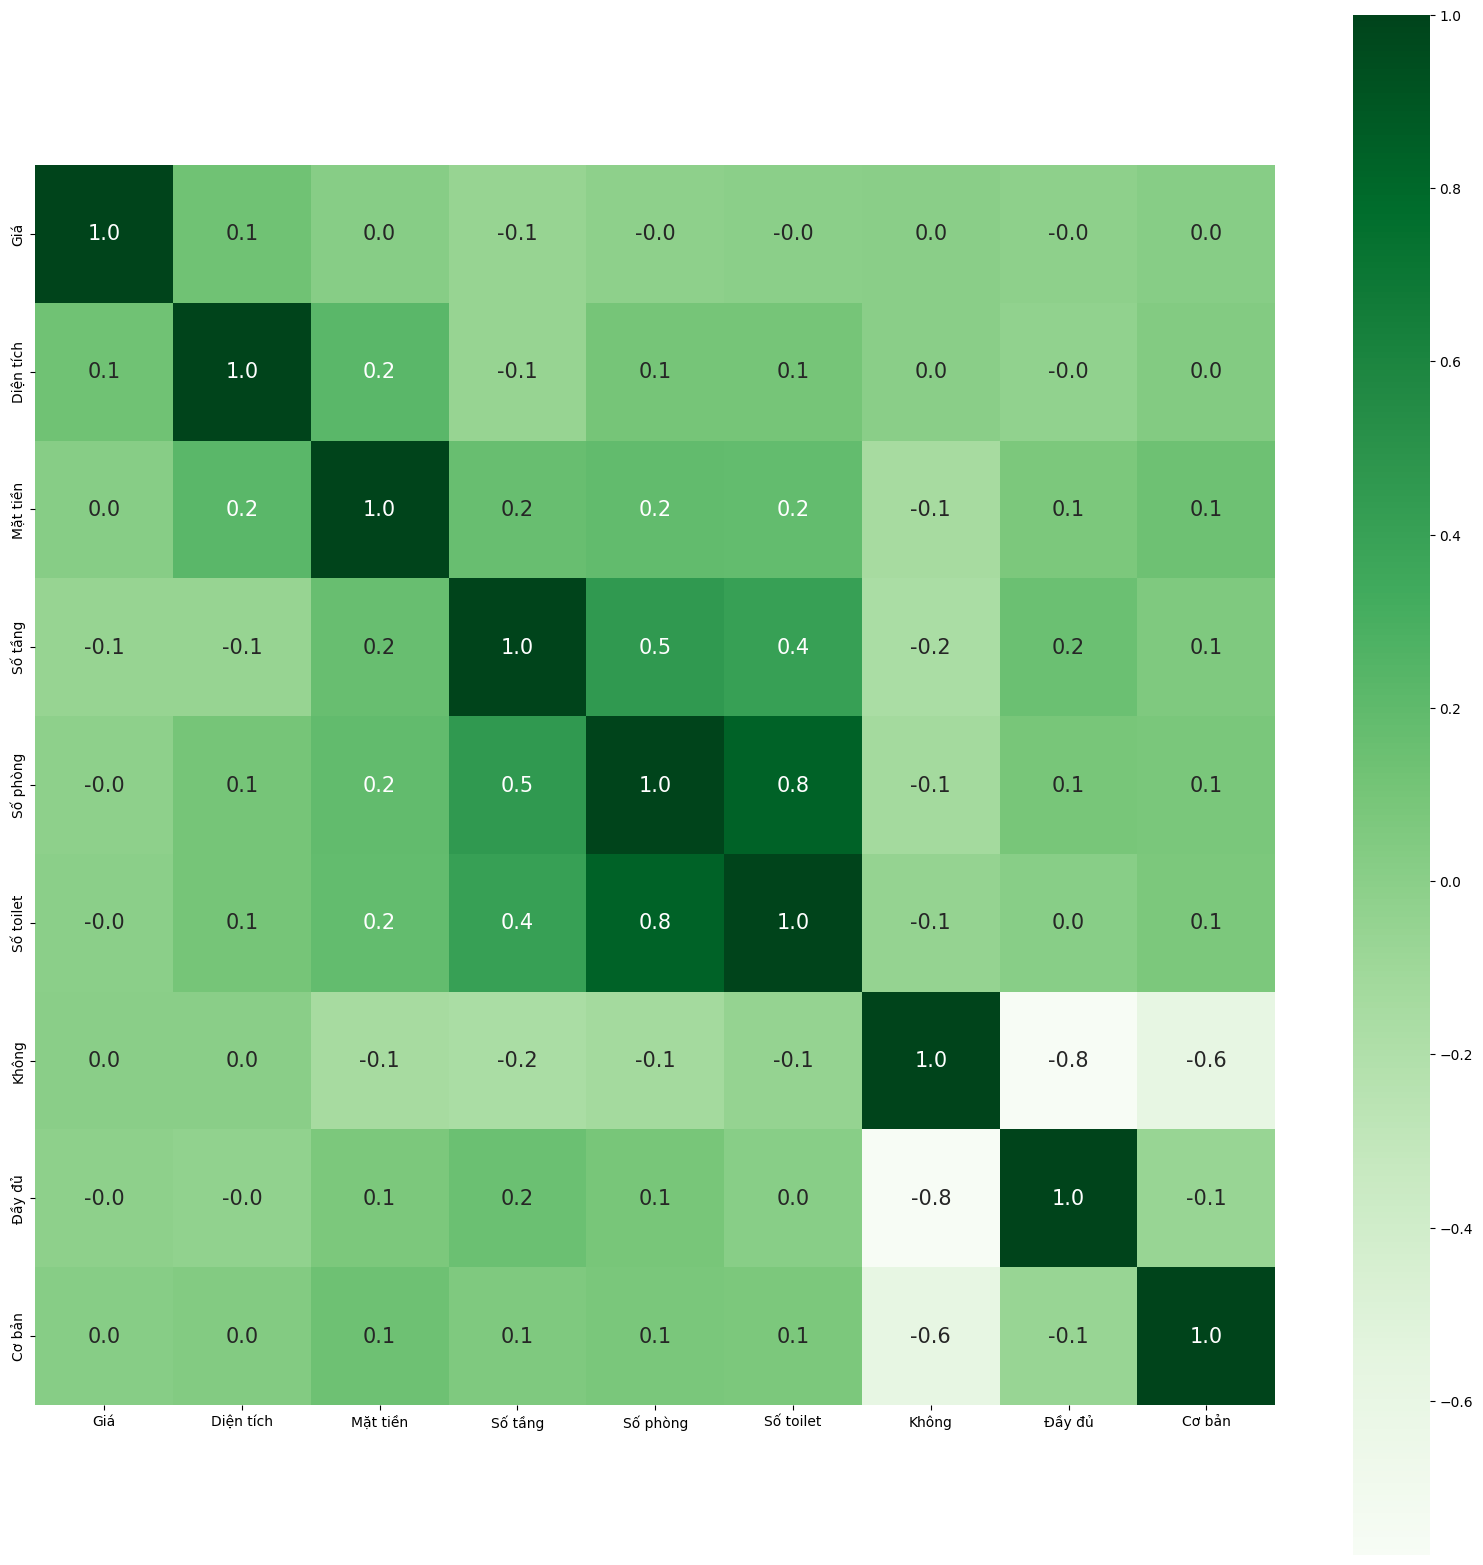

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(data_price_house.corr(), cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

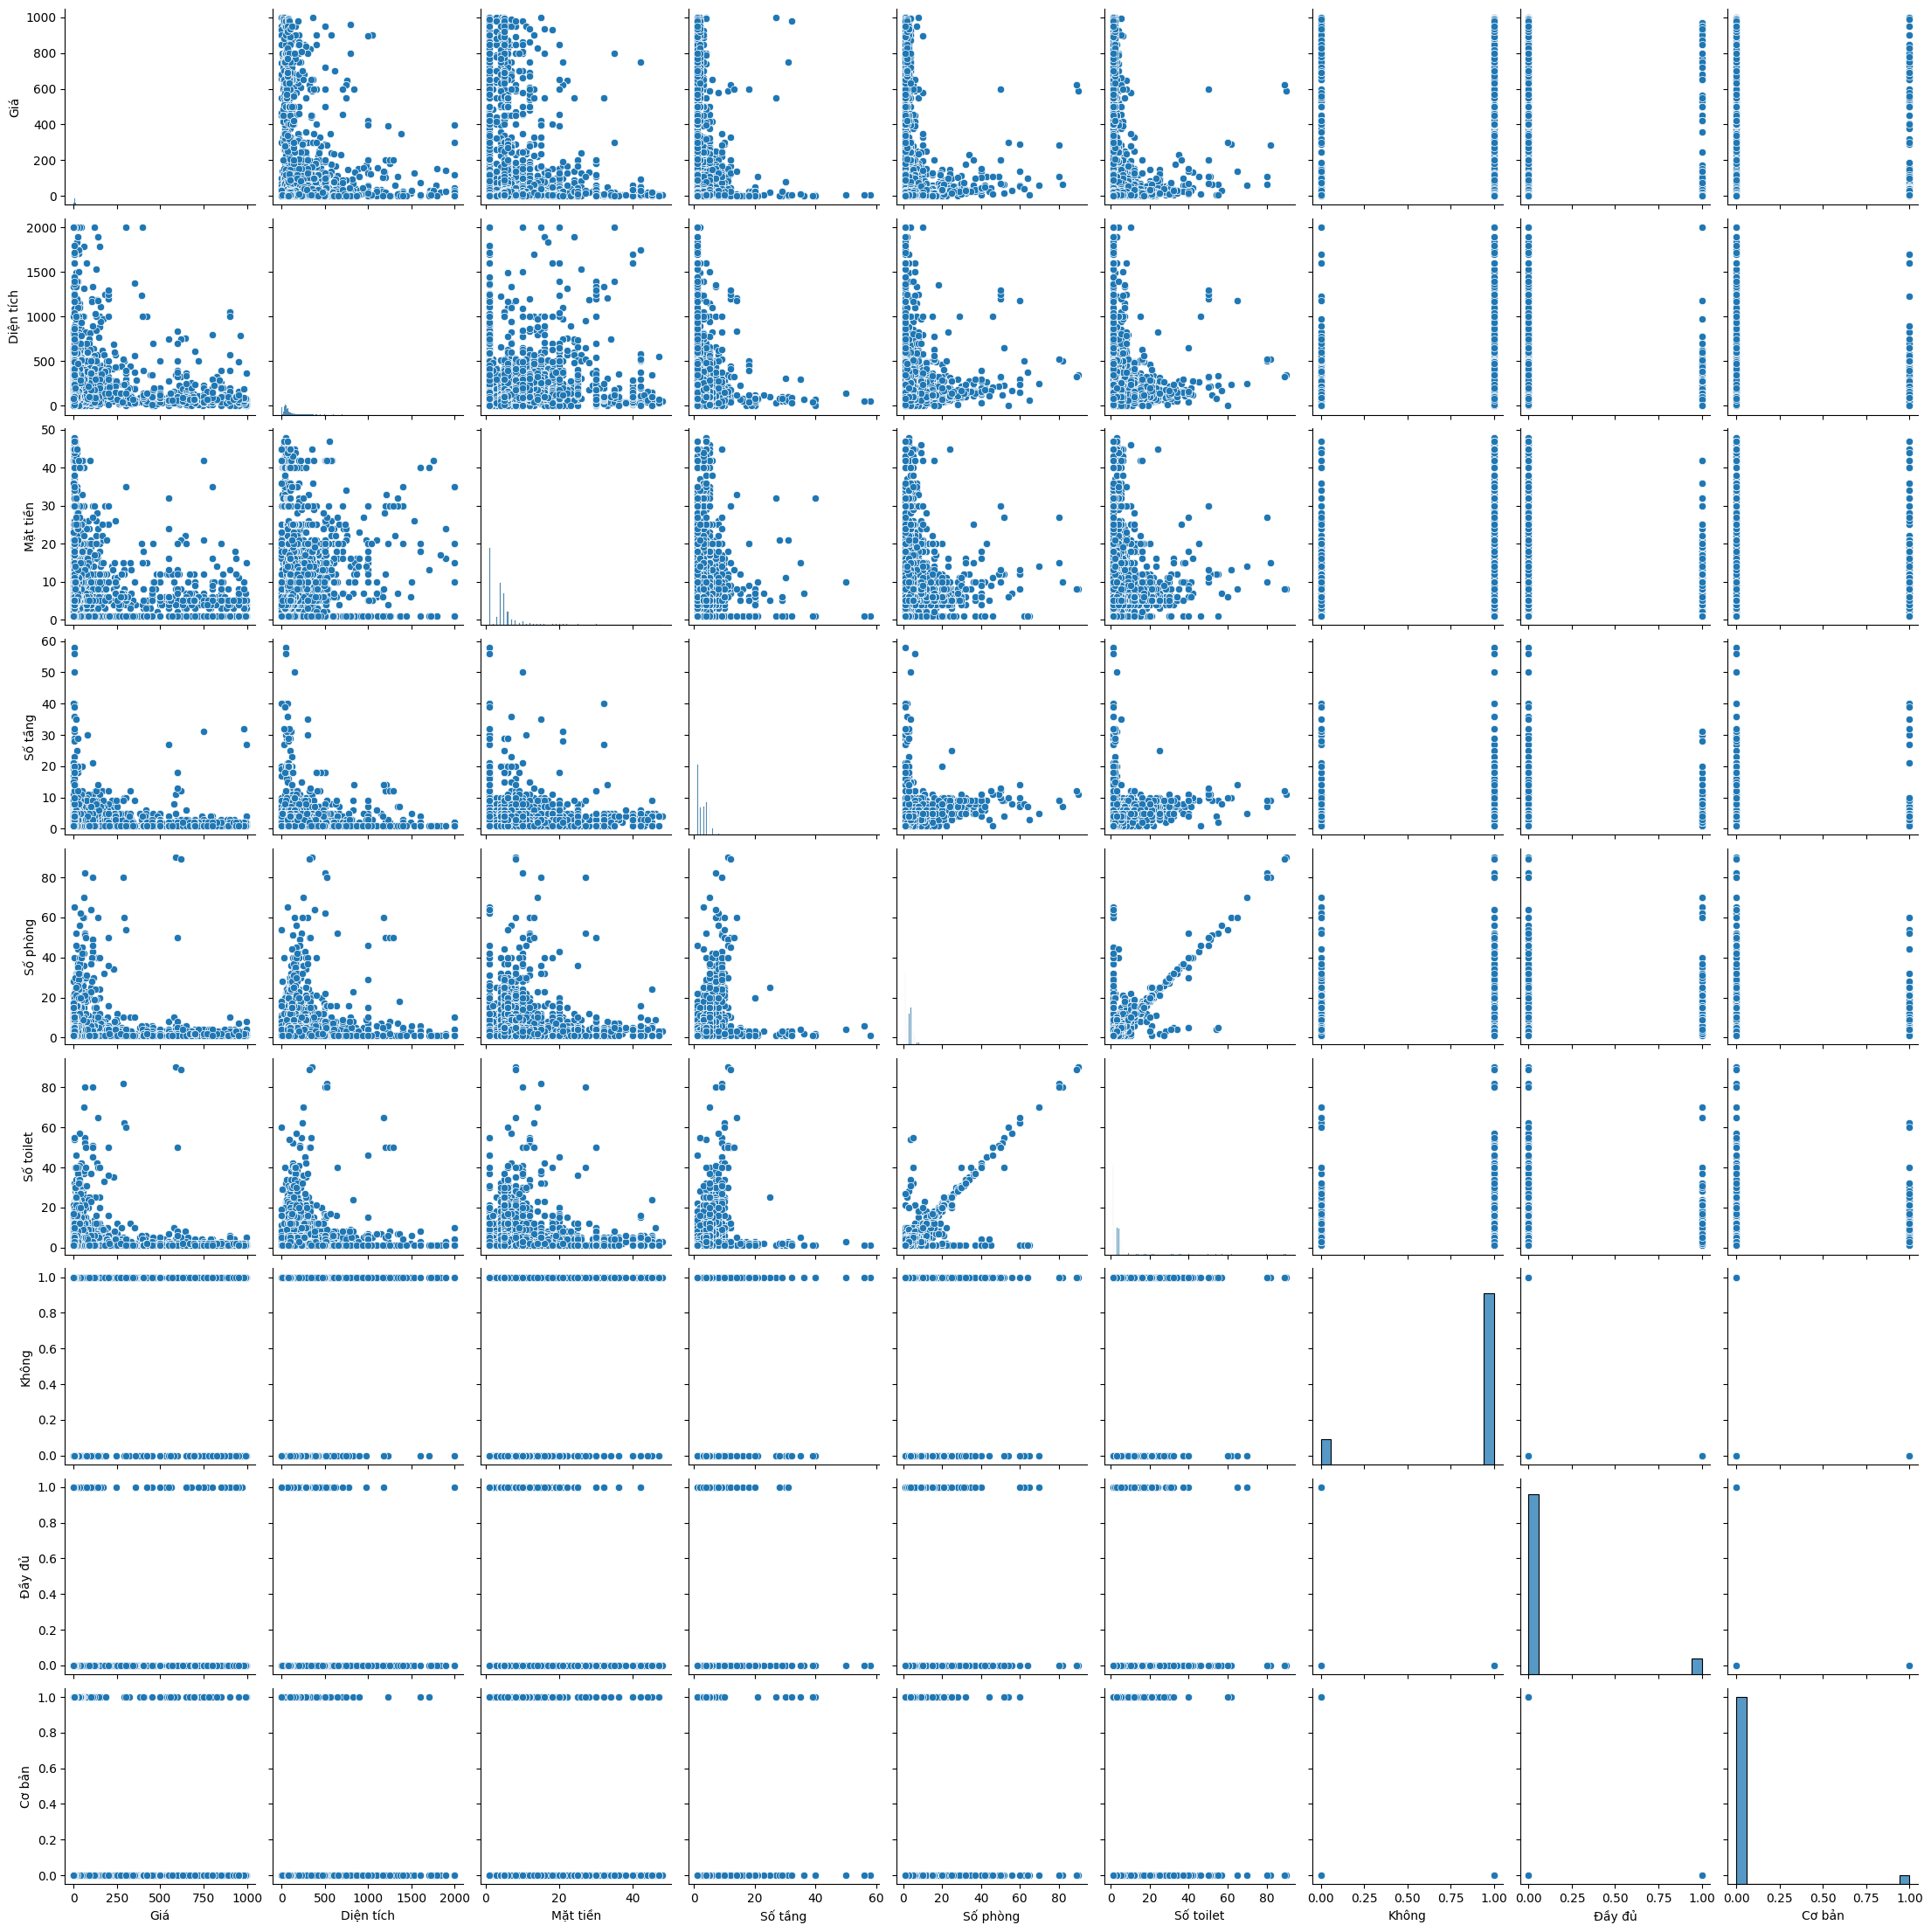

In [14]:
sns.pairplot(data_price_house)
plt.show()

In [15]:
data_price_house[(data_price_house['Diện tích']==0) | (data_price_house['Giá']==0)]

Giá  Diện tích  Mặt tiền  Số tầng  Số phòng  Số toilet  Không  Đầy đủ  \
6      0.0        0.0         4        3         3          3      0       1   
8      0.0        0.0         7        1         1          1      1       0   
65     0.0      105.0         1        1         1          5      1       0   
69     0.0      103.0         6        2         3          1      1       0   
74     0.0        0.0         6        3         5          6      1       0   
...    ...        ...       ...      ...       ...        ...    ...     ...   
35935  0.0        0.0         1        1         1          1      1       0   
35937  0.0        0.0         1        1         1          1      1       0   
35955  0.0       95.0         6        4         4          4      1       0   
35971  0.0        0.0         1        4         4          5      0       1   
35991  0.0       77.0         1        1         1          1      1       0   

       Cơ bản  
6           0  
8           0  
65          0  
69          0  
74          0  
...       ...  
35935       0  
35937       0  
35955       0  
35971       0  
35991       0  

[1899 rows x 9 columns]

# Trước đó ở cột Giá và Diện tích, các giá trị missing values tôi đã gán bằng 0. Ở đây tôi muốn sử dụng vài mô hình học máy để xử lí giá trị missing values ấy

## Xử lí missing values cho cột Diện tích, sử dụng các cột Mặt tiền	Số tầng	Số phòng	Số toilet	Không	Đầy đủ	Cơ bản. Để xây dựng mô hình dự đoán. 
## Tôi dùng một số mô hình như:
* Random Forest Regressor
* Linear Regression
* XGboost
* SVM


In [16]:
data_price_house[data_price_house['Diện tích'] != 0]

Giá  Diện tích  Mặt tiền  Số tầng  Số phòng  Số toilet  Không  \
0        4.35       36.0         6        3         3          3      1   
1        5.70       58.7         4        2         2          2      1   
2        7.00       80.0         4        4         4          5      1   
3        4.80       68.0         4        2         4          3      1   
4      800.00       28.0        35        2         1          1      1   
...       ...        ...       ...      ...       ...        ...    ...   
35987    3.00      100.0         5        4         5          5      1   
35988   10.00      200.0        10        4         3          3      1   
35989    3.00      100.0         1        4         3          3      1   
35990    3.50      342.0         1        1         1          1      1   
35991    0.00       77.0         1        1         1          1      1   

       Đầy đủ  Cơ bản  
0           0       0  
1           0       0  
2           0       0  
3           0       0  
4           0       0  
...       ...     ...  
35987       0       0  
35988       0       0  
35989       0       0  
35990       0       0  
35991       0       0  

[34796 rows x 9 columns]

In [17]:
no_missing_values_dien_tich = data_price_house[data_price_house['Diện tích'] != 0]
missing_values_dien_tich = data_price_house[data_price_house['Diện tích'] == 0]
missing_values_dien_tich.iloc[:,2:]

Mặt tiền  Số tầng  Số phòng  Số toilet  Không  Đầy đủ  Cơ bản
6             4        3         3          3      0       1       0
8             7        1         1          1      1       0       0
74            6        3         5          6      1       0       0
105           1        1         1          1      1       0       0
109           1        1         1          1      1       0       0
...         ...      ...       ...        ...    ...     ...     ...
35930         1        1         1          1      1       0       0
35931         1        1         1          1      1       0       0
35935         1        1         1          1      1       0       0
35937         1        1         1          1      1       0       0
35971         1        4         4          5      0       1       0

[1136 rows x 7 columns]

In [18]:
X = no_missing_values_dien_tich.iloc[:,2:]
y = no_missing_values_dien_tich.iloc[:,1]
print(X.head(3))
print(y.head(3))

   Mặt tiền  Số tầng  Số phòng  Số toilet  Không  Đầy đủ  Cơ bản
0         6        3         3          3      1       0       0
1         4        2         2          2      1       0       0
2         4        4         4          5      1       0       0
0    36.0
1    58.7
2    80.0
Name: Diện tích, dtype: float64


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_names = ['LinearRegression', 'RandomForestRegressor', 'XGBoost', 'SVR','Decision Tree']
# Danh sách các mô hình
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=1000, random_state=15),
    'XGBoost': XGBRegressor(n_estimators=1000, random_state=15),
    'SVR': SVR(kernel='linear'),
    'Decision Tree': DecisionTreeRegressor()
}
best_model = None
best_mse = float('inf')

def train_and_evaluate_model(model_name, X_train, X_test, y_train, y_test):
    global best_model, best_mse
    # Chọn mô hình tương ứng với tên
    model = models[model_name]

    # Huấn luyện mô hình
    model.fit(X_train, y_train)

    # Đánh giá mô hình trên tập kiểm tra
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)

    print(f"{model_name} MSE: {mse}")
    
    if mse<best_mse:
        best_mse = mse
        best_model = model

# Gọi hàm cho từng mô hình
for model_name in tqdm(model_names, desc='Training models'):
    train_and_evaluate_model(model_name, X_train, X_test, y_train, y_test)
print(best_mse)
print(best_model)

Training models:   0%|                                                                           | 0/5 [00:00<?, ?it/s]

LinearRegression MSE: 15645.658271661778


Training models:  40%|██████████████████████████▊                                        | 2/5 [00:14<00:22,  7.38s/it]

RandomForestRegressor MSE: 13450.827601783412


Training models:  60%|████████████████████████████████████████▏                          | 3/5 [00:15<00:09,  4.62s/it]

XGBoost MSE: 13768.128442253003


Training models: 100%|███████████████████████████████████████████████████████████████████| 5/5 [00:38<00:00,  7.76s/it]

SVR MSE: 16527.729465579927
Decision Tree MSE: 14530.812944879173
13450.827601783412
RandomForestRegressor(n_estimators=1000, random_state=15)


### Sử dụng best_model để dự đoán cho các missing_values_dien_tich

In [20]:
data_price_house.loc[data_price_house['Diện tích']==0, 'Diện tích'] = best_model.predict(data_price_house[data_price_house['Diện tích'] == 0].iloc[:,2:])

In [21]:
data_price_house[data_price_house['Diện tích'] == 0]

Empty DataFrame
Columns: [Giá, Diện tích, Mặt tiền, Số tầng, Số phòng, Số toilet, Không, Đầy đủ, Cơ bản]
Index: []

### Tương tự xử lí các giá trị missing values được lưu bằng 0 từ trước ở cột Giá

In [22]:
data_price_house[data_price_house['Giá'] == 0]

Giá   Diện tích  Mặt tiền  Số tầng  Số phòng  Số toilet  Không  Đầy đủ  \
6      0.0   47.862338         4        3         3          3      0       1   
8      0.0  159.240355         7        1         1          1      1       0   
65     0.0  105.000000         1        1         1          5      1       0   
69     0.0  103.000000         6        2         3          1      1       0   
74     0.0   87.512169         6        3         5          6      1       0   
...    ...         ...       ...      ...       ...        ...    ...     ...   
35935  0.0  101.023659         1        1         1          1      1       0   
35937  0.0  101.023659         1        1         1          1      1       0   
35955  0.0   95.000000         6        4         4          4      1       0   
35971  0.0  120.057942         1        4         4          5      0       1   
35991  0.0   77.000000         1        1         1          1      1       0   

       Cơ bản  
6           0  
8           0  
65          0  
69          0  
74          0  
...       ...  
35935       0  
35937       0  
35955       0  
35971       0  
35991       0  

[1408 rows x 9 columns]

In [23]:
no_missing_values_gia = data_price_house[data_price_house['Giá'] != 0]
missing_values_gia = data_price_house[data_price_house['Giá'] == 0]
missing_values_gia.iloc[:,1:]

Diện tích  Mặt tiền  Số tầng  Số phòng  Số toilet  Không  Đầy đủ  \
6       47.862338         4        3         3          3      0       1   
8      159.240355         7        1         1          1      1       0   
65     105.000000         1        1         1          5      1       0   
69     103.000000         6        2         3          1      1       0   
74      87.512169         6        3         5          6      1       0   
...           ...       ...      ...       ...        ...    ...     ...   
35935  101.023659         1        1         1          1      1       0   
35937  101.023659         1        1         1          1      1       0   
35955   95.000000         6        4         4          4      1       0   
35971  120.057942         1        4         4          5      0       1   
35991   77.000000         1        1         1          1      1       0   

       Cơ bản  
6           0  
8           0  
65          0  
69          0  
74          0  
...       ...  
35935       0  
35937       0  
35955       0  
35971       0  
35991       0  

[1408 rows x 8 columns]

In [24]:
X = no_missing_values_gia.iloc[:,1:]
y = no_missing_values_gia.iloc[:,0]
print(X.head(3))
print(y.head(3))

   Diện tích  Mặt tiền  Số tầng  Số phòng  Số toilet  Không  Đầy đủ  Cơ bản
0       36.0         6        3         3          3      1       0       0
1       58.7         4        2         2          2      1       0       0
2       80.0         4        4         4          5      1       0       0
0    4.35
1    5.70
2    7.00
Name: Giá, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_names = ['SVR','LinearRegression', 'RandomForestRegressor', 'XGBoost', 'Decision Tree']
# Danh sách các mô hình
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=1000, random_state=15),
    'XGBoost': XGBRegressor(n_estimators=1000, random_state=15),
    'SVR': SVR(kernel='linear'),
    'Decision Tree': DecisionTreeRegressor()
}
best_model = None
best_mse = float('inf')


# Gọi hàm cho từng mô hình
for model_name in tqdm(model_names, desc='Training models'):
    train_and_evaluate_model(model_name, X_train, X_test, y_train, y_test)
print(best_mse)
print(best_model)

Training models:   0%|                                                                           | 0/5 [00:00<?, ?it/s]

LinearRegression MSE: 10583.80433073679
